# <center>Credit Card Customer Churn Prediction</center>


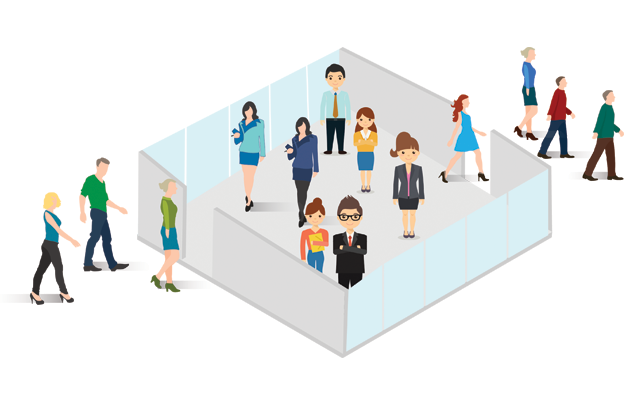

# Introduction

<b>Business Problem : </b>  
Seorang manajer bank kecewa karena dari waktu ke waktu banyak orang yang berhenti menggunakan layanan kartu kreditnya dari bank tersebut (Customer Churn) . Oleh karena itu, manajer bank ingin mencari tahu siapa saja orang  yang akan meninggalkan bank di masa depan sehingga dia dapat memberikan penawaran yang lebih baik kepada pelanggan tersebut agar tetap bersama mereka.

# Task Details

Prioritas utama dalam masalah bisnis ini adalah : <b> Mengidentifikasi pelanggan yang mengalami churn. </b>
Oleh karena itu, kita akan menyelesaikan dengan langkah-langkah berikut :
1. Mengumpulkan data
2. Mendeskripsikan data
3. Analisis mendalam tentang data 
4. Data Preprocessing dan Feature Engineering
5. Membangun model
6. Analisis model

Lalu, terdapat beberapa isu tambahan terkait hasil prediksi yang perlu kita pertimbangkan dalam masalah bisnis ini :
Ketika memprediksi pelanggan yang tidak churning sebagai pelanggan yang churning, hal itu tidak akan merugikan bisnis sehingga jika terdapat hasil prediksi seperti ini tidak perlu terlalu dipermasalahkan. 
Namuun, jika terdapat hasil prediksi pelanggan yang churning sebagai Non-churning, maka hal itu dapat merugikan bisnis karena kita tidak berhasil menyelesaikan masalah utama bisnis yaitu  mengidentifikasi pelanggan yang mengalami churn sehingga kita tidak dapat meningkatkan layanan. Oleh karena itu, diperlukan  recall yang tinggi untuk memastikan bahwa mengidentifikasikan pelanggan yang churning sebagai Non-churning dengan benar.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score

## Data Loading

In [2]:
df = pd.read_csv('BankChurners.csv')

## Feature Description
<b>CLIENTNUM</b>: Client number. Unique identifier for the customer holding the account

<b>Customer_Age</b>: Demographic variable - Customer's Age in Years

<b>Gender</b>: Demographic variable -  M=Male, F=Female

<b>Dependent_count</b>: Demographic variable - Number of dependents

<b>Education_Level</b>: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

<b>Marital_Status</b>: Demographic variable -  Married, Single, Divorced, Unknown

<b>Income_Category</b>: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)

<b>Card_Category</b>: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

<b>Months_on_book</b>: Period of relationship with bank

<b>Total_Relationship_Count</b>: Total no. of products held by the customer

<b>Months_Inactive_12_mon</b>: No. of months inactive using credit card in the last 12 months

<b>Contacts_Count_12_mon</b>: No. of Contacts in the last 12 months

<b>Credit_Limit</b>: Credit Limit on the Credit Card

<b>Total_Revolving_Bal</b>: Total Revolving Balance on the Credit Card

<b>Avg_Open_To_Buy</b>: Open to Buy Credit Line (Average of last 12 months) (The difference between the credit limit assigned to a cardholder account and the present balance on the account)

<b>Total_Amt_Chng_Q4_Q1</b>: Change in Transaction Amount (Q4 over Q1)

<b>Total_Trans_Amt</b>: Total Transaction Amount (Last 12 months)

<b>Total_Trans_Ct</b>: Total Transaction Count (Last 12 months)

<b>Total_Ct_Chng_Q4_Q1</b>: Change in Transaction Count (Q4 over Q1)

<b>Avg_Utilization_Ratio</b>: Average Card Utilization Ratio (In other words, it's how much you currently owe divided by your credit limit)

## Target
Target
Attrition_Flag: Internal event (customer activity) variable => if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

# Data Preparation

## A. Ringkasan mengenai data

### 1) Deskripsi setiap kelompok fitur

In [3]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,574.688943,4404.086304,64.858695,518.464910,247.333503
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,310.108088,3397.129254,23.472570,316.647227,274.452904
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,484.000000,2155.500000,45.000000,316.000000,0.060000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,674.000000,3899.000000,67.000000,625.000000,132.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,792.000000,4741.000000,81.000000,761.000000,463.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,999.000000,18484.000000,139.000000,981.000000,999.000000


In [4]:
# Melihat deskripsi statistik dari kelompok fitur kategorik
df.describe(include=object)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [5]:
#Keseluruhan dataset
df.shape

(10127, 21)

### 2) Jumlah Atribut

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

> Dari hasil diatas terlihat bahwa terdapat 15 numeric variable dan 6 categorical variable

### 3) Jumlah missing values dan duplikasi data  

In [7]:
miss_val = df.isna().sum()
dpl = df.duplicated().sum()
print(miss_val)
print("Jumlah duplikasi data : " + str(dpl))

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Jumlah duplikasi data : 0


> Dari hasil diatas terlihat bahwa tidak terdapat missing values dan duplikasi pada dataset

### 4) Cek kemungkinan adanya Outlier

In [8]:
num_cols = df.select_dtypes(include=np.number)

In [9]:
def cek_outlier(data):
    for i in data.columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3-Q1
        RLB = Q1-1.5*IQR
        RUB = Q3+1.5*IQR
        count_outlier = ((data[i]<RLB) | (data[i]>RUB)).sum()
        print(i + " =  " + str(count_outlier))

cek_outlier(num_cols)

CLIENTNUM =  0
Customer_Age =  2
Dependent_count =  0
Months_on_book =  386
Total_Relationship_Count =  0
Months_Inactive_12_mon =  331
Contacts_Count_12_mon =  629
Credit_Limit =  984
Total_Revolving_Bal =  0
Avg_Open_To_Buy =  963
Total_Amt_Chng_Q4_Q1 =  1954
Total_Trans_Amt =  896
Total_Trans_Ct =  2
Total_Ct_Chng_Q4_Q1 =  0
Avg_Utilization_Ratio =  0


> Terlihat bahwa terdapat kemungkinan outlier di beberapa fitur

## B. Eksplorasi data

### 1) Visualisasi Categorical Variables

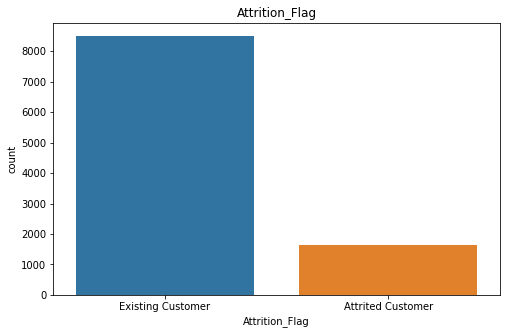

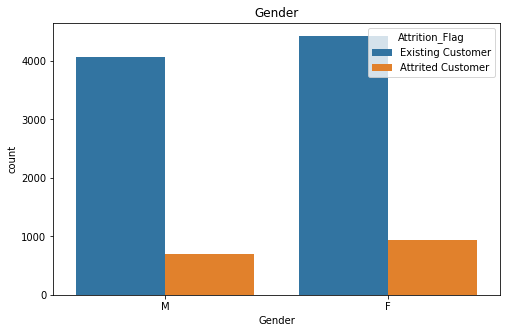

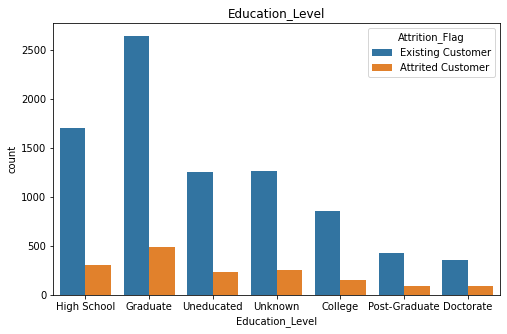

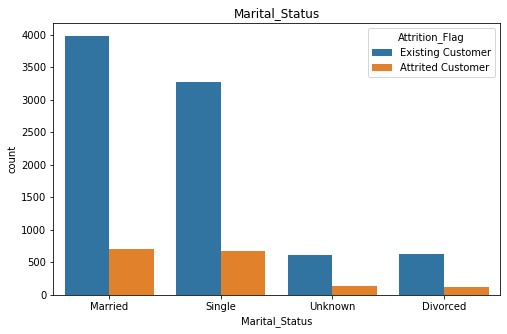

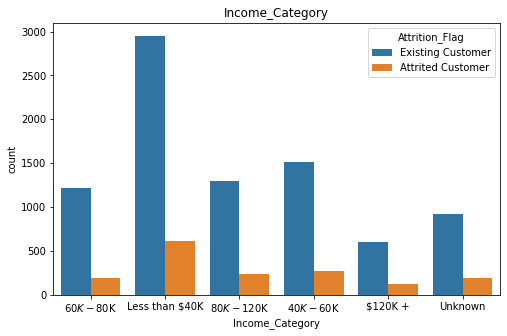

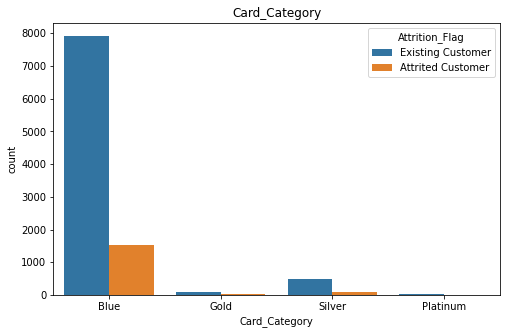

In [10]:
categorical_features = df.select_dtypes(include="object")

for a_feature in categorical_features:
    plt.figure(figsize=(8, 5))
    plt.title(a_feature)
    if (a_feature != "Attrition_Flag"):
        sns.countplot(x=categorical_features[a_feature],hue=categorical_features['Attrition_Flag'])
    else :
        sns.countplot(x=categorical_features[a_feature])

><br><b>Dari visualisasi Categorical Features diatas, dapat kita simpulkan beberapa point :</b><br/>
<br>1.Imbalanced dataset dengan terget clumn mempunyai perbandingan sekitar 85% : 15%</br> 
<br>2.Perempuan yang memiliki credit card lebih banyak daripada  laki-laki<br>
3.Orang yang telah lulus pendidikan lebih banyak yang memiliki credit card<br>
4.Orang yang telah menikah lebih banyak yang memiliki credit card<br>
5.Kebanyakan orang memiliki pendapatan kurang dari 40k$<br>
6.Hampir 90% orang memiliki blue card

### 2) Visualisasi Numerical Variables

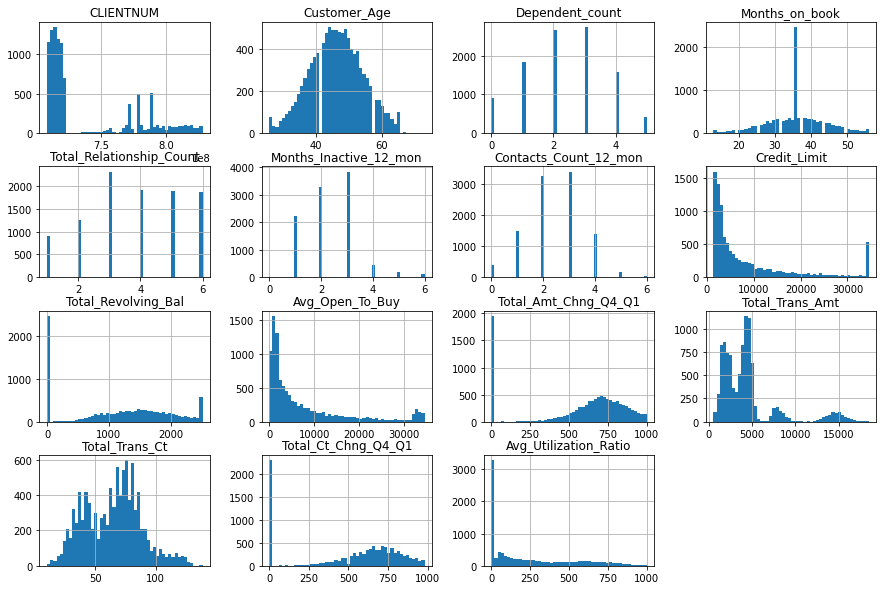

In [11]:
num_cols.hist(bins=50, figsize=(15,10))
plt.show()

><br><b>Dari visualisasi Numerical Features diatas, dapat kita simpulkan beberapa point :</b><br/>
1.Distribusi fitur Customer_Age  mengikuti distribusi yang cukup normal.<br> 
2.Distribusi fitur Dependent_count didistribusikan secara normal dengan sedikit kemiringan kanan<br>
3.Pada fitur Months_on_book dan Total_Revolving_Bal lebih menuju ke distribusi berbentuk sangat datar.<br>
4.Pada fitur Total_Relationship_Count tampaknya lebih mendekati distribusi uniform.<br>
5.Pada fitur Total_Trans_Amt dan Total_trans_Ct(dalam 12 bulan terakhir) menampilkan distribusi multimoda, yang berarti distribusi tersbut memiliki beberapa grup lagi. Ini bisa menjadi eksperimen yang menarik untuk mencoba dan mengelompokkan grup yang berbeda dan melihat kesamaan dan perbedaan di antara mereka yang menciptakan mode berbeda dalam distribusi tersebut.<br>

#### Korelasi antar fitur numerik

Text(0.5, 1.0, 'Korelasi fitur numerik')

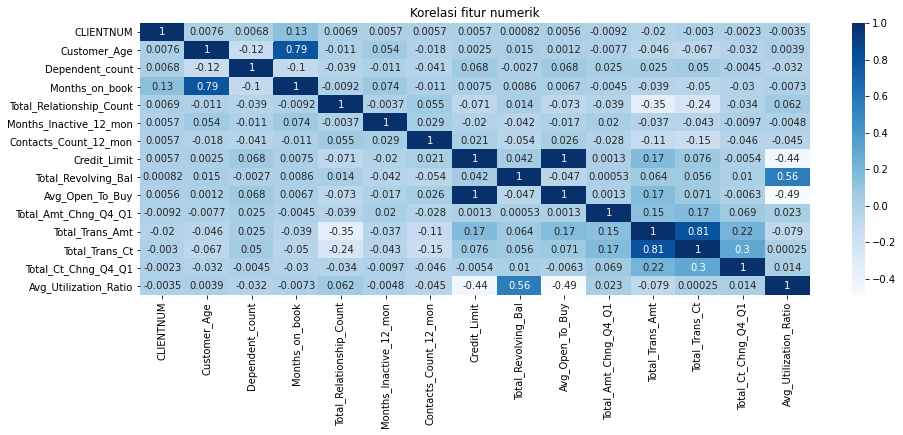

In [12]:
plt.figure(figsize=(15,5))

sns.heatmap(num_cols.corr(), 
        annot=True,
        cmap=plt.cm.Blues,
        xticklabels=df.select_dtypes(np.number).columns,
        yticklabels=df.select_dtypes(np.number).columns)
plt.title("Korelasi fitur numerik")

>Dari data diatas terlihat bahwa beberapa fitur saling memiliki korelasi tinggi, artinya jika a naik maka b juga naik.
Oleh karena itu, kita dapat menghapus fitur yang  berkorelasi tinggi yang akan dilakukan dalam proses pemilihan fitur.

# Data Preprocessing And Feature Engineering 

### A. Menangani Categorical Variable

In [13]:
#Gunakan One Hot Encoding karena nominal variables (gender,card_category etc.) bukan ordinal varavles
#dan juga karena beberapa atribut lainnya mempunyai "Unknown" value,
# sehingga tidak dapat diubah ke ordinal variable untuk menggunakan Label Encoding 

target = categorical_features.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

cat_cols=pd.get_dummies(categorical_features.drop(columns=['Attrition_Flag']))
cat_cols.shape

(10127, 23)

 ### B. Drop Fitur numerik yang memiliki korelasi yang tinggi sehingga kita pilih 1 fitur  saja

In [14]:
correlated_features = set()
correlation_matrix = num_cols.corr()

# Drop fitur yang mempunyai pearson coffecients lebih besar dari 0.8
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
num_cols= num_cols.drop(correlated_features, axis=1)
num_cols.shape

(10127, 13)

### C. Scalling

In [15]:
#scalling menggunakan binning agar memperkecil range values, disini saya menggunaajan interval sampai 100 saja
for i in ['Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']:
    col = num_cols[i]
    diff = col.max() - col.min()
    bins = np.digitize(col, np.arange(col.min(), col.max(), (diff/100)).tolist())
    num_cols[i] = bins

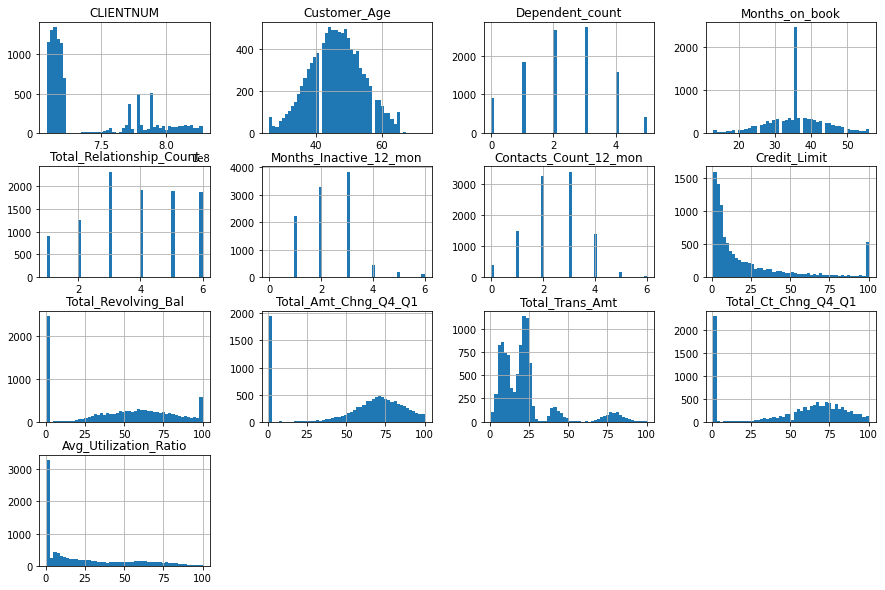

In [16]:
num_cols.hist(bins=50, figsize=(15,10))
plt.show()

### D. Data cleaned

In [17]:
#Gabungkan numeric dan variable
result = [target,num_cols,cat_cols]
df_cleaned = pd.concat(result, axis=1, join='inner')

# Menyiapkan Data

In [18]:
X = df_cleaned.drop(['Attrition_Flag','CLIENTNUM'],axis=1)
y = df_cleaned['Attrition_Flag']

> Pada X features drop 'Attrition_Flag' karena fitur tersebut merupakan target sehingga perlu dipisahkan dari X features yang 
berisi fitur yang dapat mempengaruhi prediksi target. Sedangkan Fitur 'CLIENTNUM' adalah fitur dari id client dan karena dipastikan 
unik semua sehingga fitur ini tidak mempengaruhi prediksi target sehingga lebih baik di drop saja.

#### Data Upsampling

Karena dataset imbalanced(dataset tidak siembang), terdapat dua teknik yang harus dilakukan untuk menangani kumpulan data yang tidak seimbang, yaitu oversampling atau undersampling.
Jika datanya terlalu besar kita dapat melakukan down sampling, tetapi karena dataset ini tidak terlalu besar, maka lakukan oversampling

Distribution of target Existing Customer & Attrited Customer: 8500 & 1627


<AxesSubplot:>

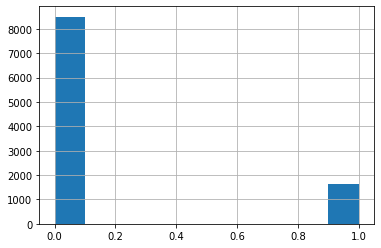

In [19]:
count = Counter(y)
print('Distribution of target Existing Customer & Attrited Customer:', count[0], '&', count[1])
y.hist()

Distribution of target Existing Customer & Attrited Customer: 8500 & 8500


<AxesSubplot:>

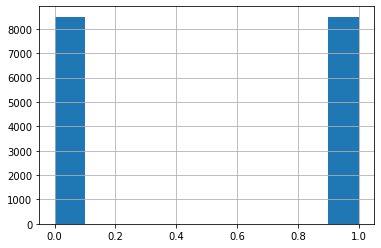

In [20]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)
count = Counter(y)
print('Distribution of target Existing Customer & Attrited Customer:', count[0], '&', count[1])
y.hist()

#### Membagikan dataset dengan perbandingan 80% training set dan 20%train test.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(13600, 35) (13600,) (3400, 35) (3400,)


# Model Building

In [22]:
classifiers = [[RandomForestClassifier(),'Random Forest'], 
[KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC']]

In [23]:
accuracy_list = []
recall_list = []
cross_val_list = []
roc_auc_list = []

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    cls= model.fit(X_train, y_train)
    
    pred = cls.predict(X_test)

    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred) 
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, pred)
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    cross_val_list.append(cross_val)
    roc_auc_list.append(roc_auc)
    
    print(model_name, 'Accuracy:     ' + str(round(accuracy*100, 2)) + '%')
    print(model_name,'Recall:    '+ str(round(recall*100, 2)) + '%')
    print(model_name, 'cross val score: ' +str(round(cross_val*100, 2)) + '%')
    print(model_name, 'roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')
    print("\n")

Random Forest Accuracy:     96.5%
Random Forest Recall:    95.12%
Random Forest cross val score: 94.41%
Random Forest roc auc score:   96.5%


K-Nearest Neighbours Accuracy:     91.65%
K-Nearest Neighbours Recall:    98.06%
K-Nearest Neighbours cross val score: 85.91%
K-Nearest Neighbours roc auc score:   91.65%


SGD Classifier Accuracy:     88.21%
SGD Classifier Recall:    80.59%
SGD Classifier cross val score: 78.47%
SGD Classifier roc auc score:   88.21%


SVC Accuracy:     83.38%
SVC Recall:    82.94%
SVC cross val score: 78.85%
SVC roc auc score:   83.38%




# Analisis Model

Pada hasil diatas, terlihat bahwa hasil model mengunakan algoritma Random Forest memberikan hasil yang terbaik dengan mempertimbangkan accuracy dan recall yang tinggi dibandingkan algoritma lainnya. Oleh karena itu, saya memilih klasifikasi Random Forest untuk membuat prediksi akhir.

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred) 
cross_val = cross_val_score(model, X_test, y_test).mean()
roc_auc = roc_auc_score(y_test, pred)

print('Hasil prediksi model menggunakan Random Forest Calssification')
print('Accuracy:     ' + str(round(accuracy*100, 2)) + '%')
print('Recall:    '+ str(round(recall*100, 2)) + '%')
print('cross val score: ' +str(round(cross_val*100, 2)) + '%')
print('roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')

Hasil prediksi model menggunakan Random Forest Calssification
Accuracy:     96.38%
Recall:    95.24%
cross val score: 94.44%
roc auc score:   96.38%


#### Terima Kasih